# Factors Influencing Heavy Traffic on I-94: Weather, Time, and Weekday Analysis

This analysis investigates the factors that contribute to heavy traffic on I-94, focusing on weather conditions, time of day, and weekdays. By examining historical data and studying patterns, this study aims to uncover insights that can help understand the causes of congestion on this highway. The findings will inform strategies to alleviate traffic issues and assist commuters and authorities in making informed decisions.

In [3]:
#import csv file and deps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print(metro.head())
print(metro.tail())
metro.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

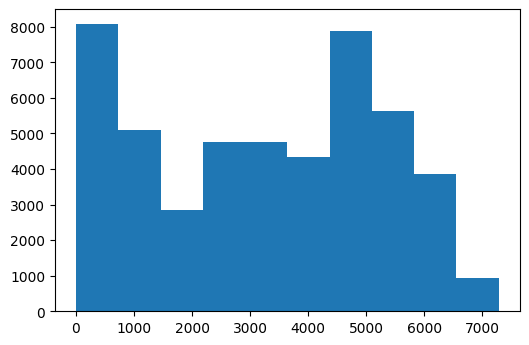

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
#need to run only once
%matplotlib inline

#plot a histogram for traffic volume
plt.hist(metro['traffic_volume'])
plt.show()

#more info on the dataset
metro['traffic_volume'].describe()

In [23]:
#convert to datetime and split
metro['date_time'] = pd.to_datetime(metro['date_time'])

day = metro.copy()[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
print(day.shape)

night = metro.copy()[(metro['date_time'].dt.hour >= 19) | (metro['date_time'].dt.hour < 7)]
print(night.shape)

print(day['traffic_volume'].describe())
print(night['traffic_volume'].describe())

(23877, 9)
(24327, 9)
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


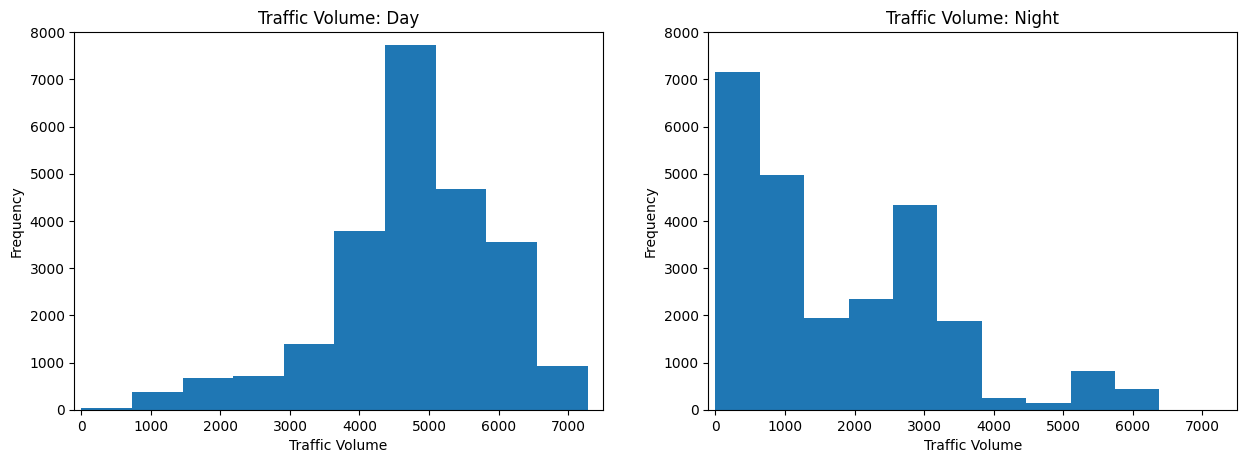

In [22]:
#draw the plots

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

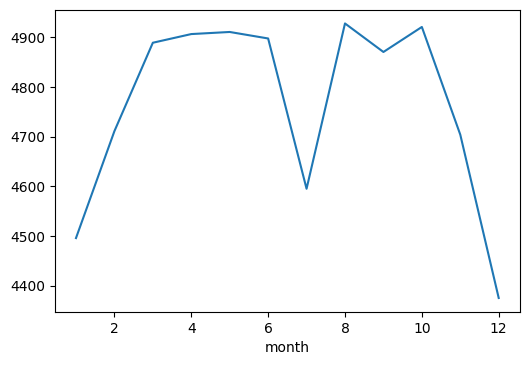

In [26]:
#get monthly averages
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

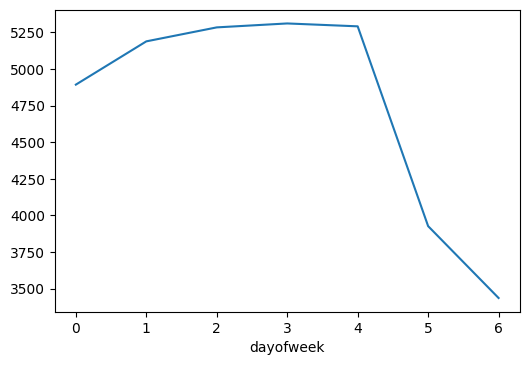

In [28]:
#average by week
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

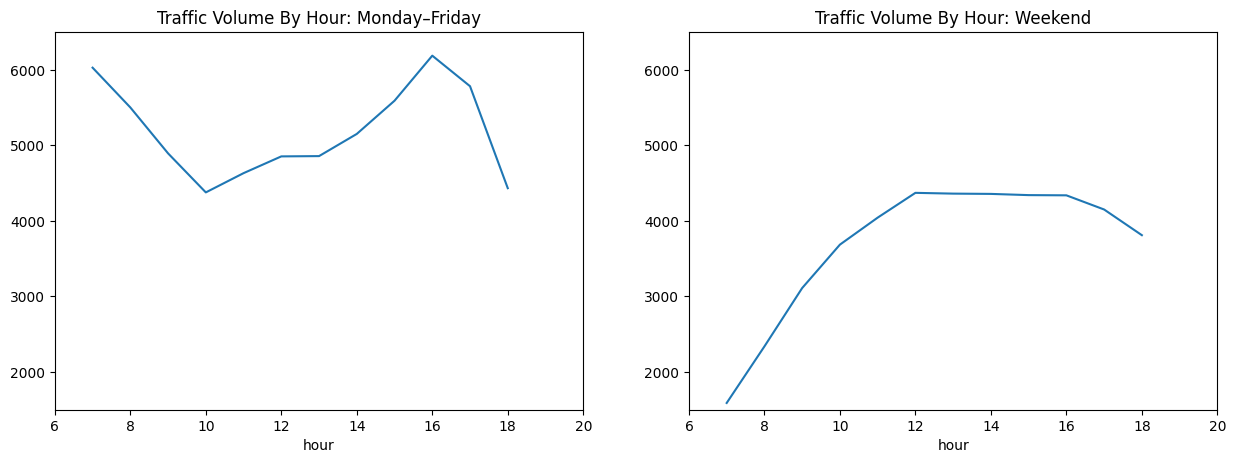

In [29]:
#plot to see changes by time of day'
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

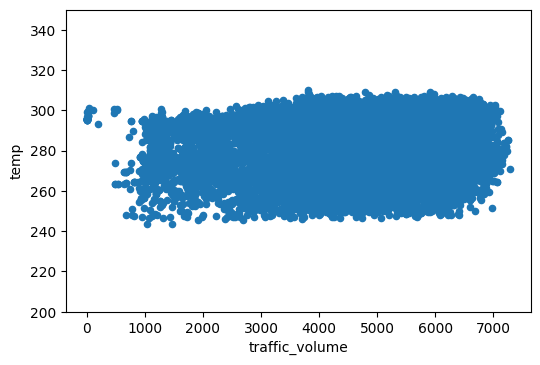

In [33]:
#find correlation
day.corr()['traffic_volume']

#plot
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 350)
plt.show()

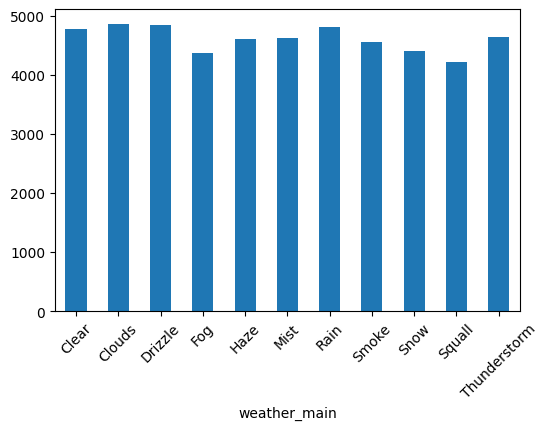

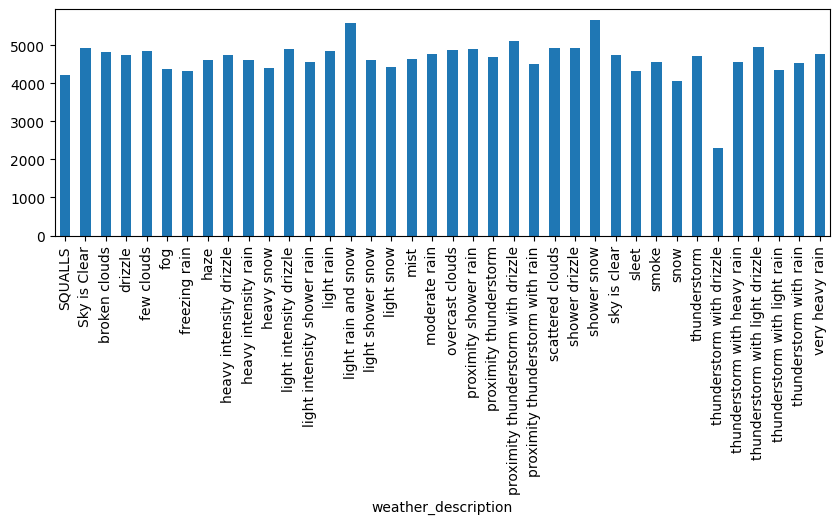

In [43]:
#weather types
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.bar(rot=45)
plt.show()

by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.bar(figsize=(10,3))
plt.show()